# SetUp

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from tqdm import tqdm

# Model(MLP)

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = x.view(-1, 28*28)  # flatten
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Data

In [ ]:
# Load dataset

transform = transforms.ToTensor()

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)


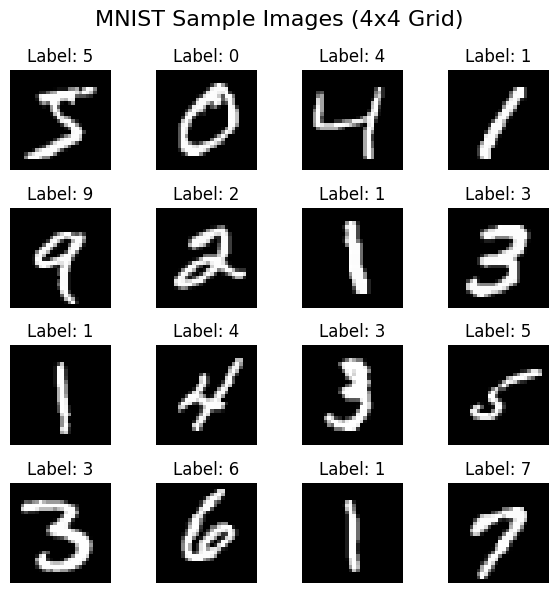

In [ ]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

# 4x4 example images
fig, axes = plt.subplots(4, 4, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    img, label = train_dataset[i]
    ax.imshow(img.squeeze(), cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')
plt.suptitle("MNIST Sample Images (4x4 Grid)", fontsize=16)
plt.tight_layout()
plt.show()

# Train

In [ ]:
# Hyperparameters
batch_size = 256
lr = 0.0005
epochs = 15

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Device:", device)

Device: cuda


In [ ]:
model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

In [ ]:
train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in tqdm(range(epochs), desc="Training Epochs"):
    model.train()
    total_loss = 0
    correct, total = 0, 0

    # Train Loop
    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    train_loss = total_loss / len(train_loader)
    train_acc = correct / total

    # Validation Loop
    model.eval()
    val_loss = 0
    val_correct, val_total = 0, 0
    with torch.no_grad():
        for imgs, labels in test_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

    val_loss /= len(test_loader)
    val_acc = val_correct / val_total

    # 기록
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    print(f": Epoch [{epoch+1}/{epochs}] "
          f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
          f"Train Acc: {train_acc*100:.2f}%, Val Acc: {val_acc*100:.2f}%")

Training Epochs:   7%|▋         | 1/15 [00:07<01:50,  7.90s/it]

: Epoch [1/15] Train Loss: 0.7243, Val Loss: 0.2879, Train Acc: 81.28%, Val Acc: 91.70%


Training Epochs:  13%|█▎        | 2/15 [00:15<01:41,  7.82s/it]

: Epoch [2/15] Train Loss: 0.2852, Val Loss: 0.2121, Train Acc: 91.75%, Val Acc: 93.76%


Training Epochs:  20%|██        | 3/15 [00:22<01:29,  7.45s/it]

: Epoch [3/15] Train Loss: 0.2182, Val Loss: 0.1648, Train Acc: 93.61%, Val Acc: 95.12%


Training Epochs:  27%|██▋       | 4/15 [00:30<01:23,  7.58s/it]

: Epoch [4/15] Train Loss: 0.1773, Val Loss: 0.1385, Train Acc: 94.78%, Val Acc: 95.79%


Training Epochs:  33%|███▎      | 5/15 [00:39<01:19,  7.94s/it]

: Epoch [5/15] Train Loss: 0.1497, Val Loss: 0.1180, Train Acc: 95.51%, Val Acc: 96.28%


Training Epochs:  40%|████      | 6/15 [00:47<01:11,  7.96s/it]

: Epoch [6/15] Train Loss: 0.1292, Val Loss: 0.1054, Train Acc: 96.23%, Val Acc: 96.67%


Training Epochs:  47%|████▋     | 7/15 [00:54<01:03,  7.95s/it]

: Epoch [7/15] Train Loss: 0.1140, Val Loss: 0.0973, Train Acc: 96.69%, Val Acc: 96.86%


Training Epochs:  53%|█████▎    | 8/15 [01:02<00:54,  7.84s/it]

: Epoch [8/15] Train Loss: 0.1026, Val Loss: 0.0885, Train Acc: 96.97%, Val Acc: 97.12%


Training Epochs:  60%|██████    | 9/15 [01:10<00:46,  7.83s/it]

: Epoch [9/15] Train Loss: 0.0931, Val Loss: 0.0888, Train Acc: 97.22%, Val Acc: 97.25%


Training Epochs:  67%|██████▋   | 10/15 [01:18<00:38,  7.78s/it]

: Epoch [10/15] Train Loss: 0.0833, Val Loss: 0.0800, Train Acc: 97.50%, Val Acc: 97.40%


Training Epochs:  73%|███████▎  | 11/15 [01:25<00:30,  7.59s/it]

: Epoch [11/15] Train Loss: 0.0756, Val Loss: 0.0773, Train Acc: 97.66%, Val Acc: 97.50%


Training Epochs:  80%|████████  | 12/15 [01:32<00:22,  7.65s/it]

: Epoch [12/15] Train Loss: 0.0695, Val Loss: 0.0737, Train Acc: 97.82%, Val Acc: 97.67%


Training Epochs:  87%|████████▋ | 13/15 [01:39<00:14,  7.44s/it]

: Epoch [13/15] Train Loss: 0.0650, Val Loss: 0.0707, Train Acc: 97.99%, Val Acc: 97.69%


Training Epochs:  93%|█████████▎| 14/15 [01:47<00:07,  7.54s/it]

: Epoch [14/15] Train Loss: 0.0604, Val Loss: 0.0688, Train Acc: 98.08%, Val Acc: 97.95%


Training Epochs: 100%|██████████| 15/15 [01:55<00:00,  7.70s/it]

: Epoch [15/15] Train Loss: 0.0570, Val Loss: 0.0707, Train Acc: 98.21%, Val Acc: 97.77%


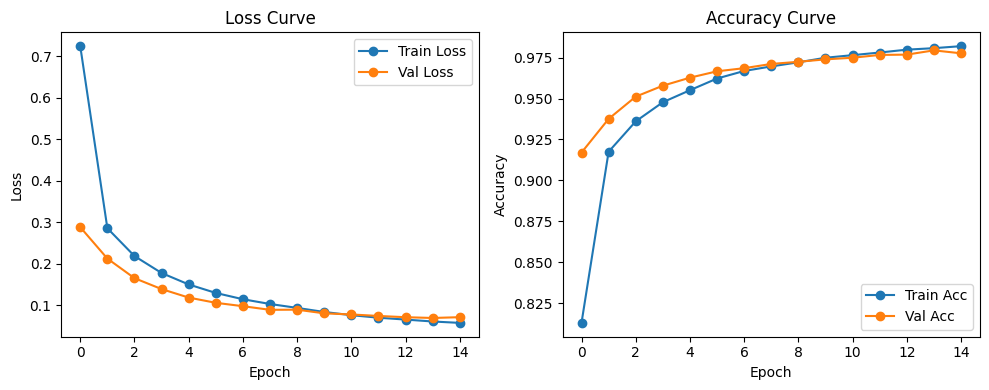

In [ ]:
import matplotlib.pyplot as plt

# Visualize learning-curve
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss', marker='o')
plt.plot(val_losses, label='Val Loss', marker='o')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accs, label='Train Acc', marker='o')
plt.plot(val_accs, label='Val Acc', marker='o')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluation

In [ ]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for imgs, labels in test_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")


Test Accuracy: 97.77%


# Analysis

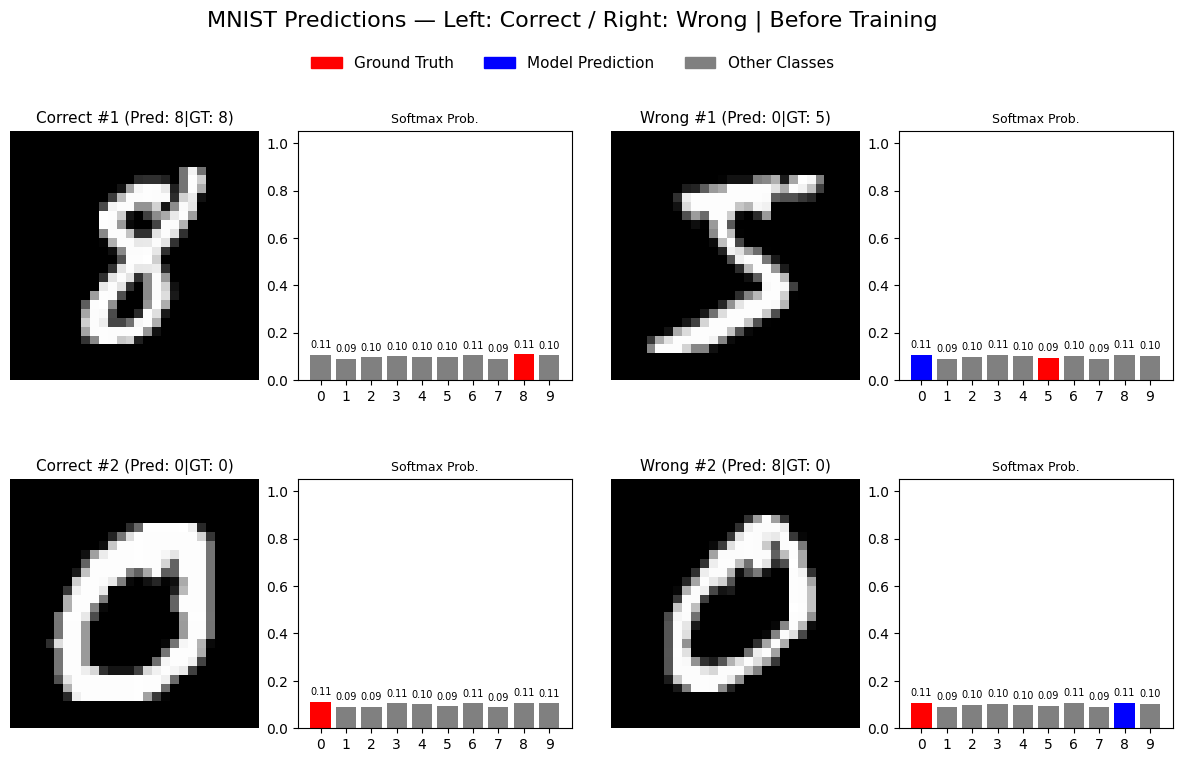

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
import matplotlib.patches as mpatches

model_bt = MLP().to(device)
model_bt.eval()

correct_samples, wrong_samples = [], []

for idx in range(len(train_dataset)):
    img, label = train_dataset[idx]
    with torch.no_grad():
        x = img.unsqueeze(0).to(device)
        logits = model_bt(x)
        probs = F.softmax(logits, dim=1).cpu().numpy().flatten()
    pred = np.argmax(probs)

    if pred == label and len(correct_samples) < 2:
        correct_samples.append((idx, img, label, pred, probs))
    elif pred != label and len(wrong_samples) < 2:
        wrong_samples.append((idx, img, label, pred, probs))
    if len(correct_samples) == 2 and len(wrong_samples) == 2:
        break

fig = plt.figure(figsize=(15, 8))
gs = GridSpec(2, 4, figure=fig, width_ratios=[1, 1.1, 1, 1.1], wspace=0.15, hspace=0.3)

samples = [
    ("Correct #1", correct_samples[0]),
    ("Wrong #1", wrong_samples[0]),
    ("Correct #2", correct_samples[1]),
    ("Wrong #2", wrong_samples[1]),
]

for i, (title, (idx, img, label, pred, probs)) in enumerate(samples):
    row = i // 2
    col = (i % 2) * 2  # 0, 2
    img_ax = fig.add_subplot(gs[row, col])
    bar_ax = fig.add_subplot(gs[row, col + 1])

    img_ax.imshow(img.squeeze(), cmap='gray')
    img_ax.set_title(f"{title} (Pred: {pred}|GT: {label})", fontsize=11)
    img_ax.axis('off')

    colors = []
    for j in range(10):
        if j == label:
            colors.append("red")       # GT
        elif j == pred:
            colors.append("blue")      # pred
        else:
            colors.append("gray")

    bars = bar_ax.bar(range(10), probs, color=colors)
    bar_ax.set_ylim(0, 1.05)
    bar_ax.set_xticks(range(10))
    bar_ax.set_title("Softmax Prob.", fontsize=9)

    for j, p in enumerate(probs):
        if p > 0.05:
            bar_ax.text(j, p + 0.02, f"{p:.2f}", ha='center', va='bottom', fontsize=7)
    img_pos = img_ax.get_position()
    bar_pos = bar_ax.get_position()
    bar_ax.set_position([bar_pos.x0, img_pos.y0, bar_pos.width, img_pos.height])

red_patch = mpatches.Patch(color='red', label='Ground Truth')
blue_patch = mpatches.Patch(color='blue', label='Model Prediction')
gray_patch = mpatches.Patch(color='gray', label='Other Classes')

fig.legend(
    handles=[red_patch, blue_patch, gray_patch],
    loc='upper center',
    bbox_to_anchor=(0.5, 0.98),
    ncol=3,
    fontsize=11,
    frameon=False
)

plt.suptitle("MNIST Predictions — Left: Correct / Right: Wrong | Before Training", fontsize=16, y=1.02)
plt.show()

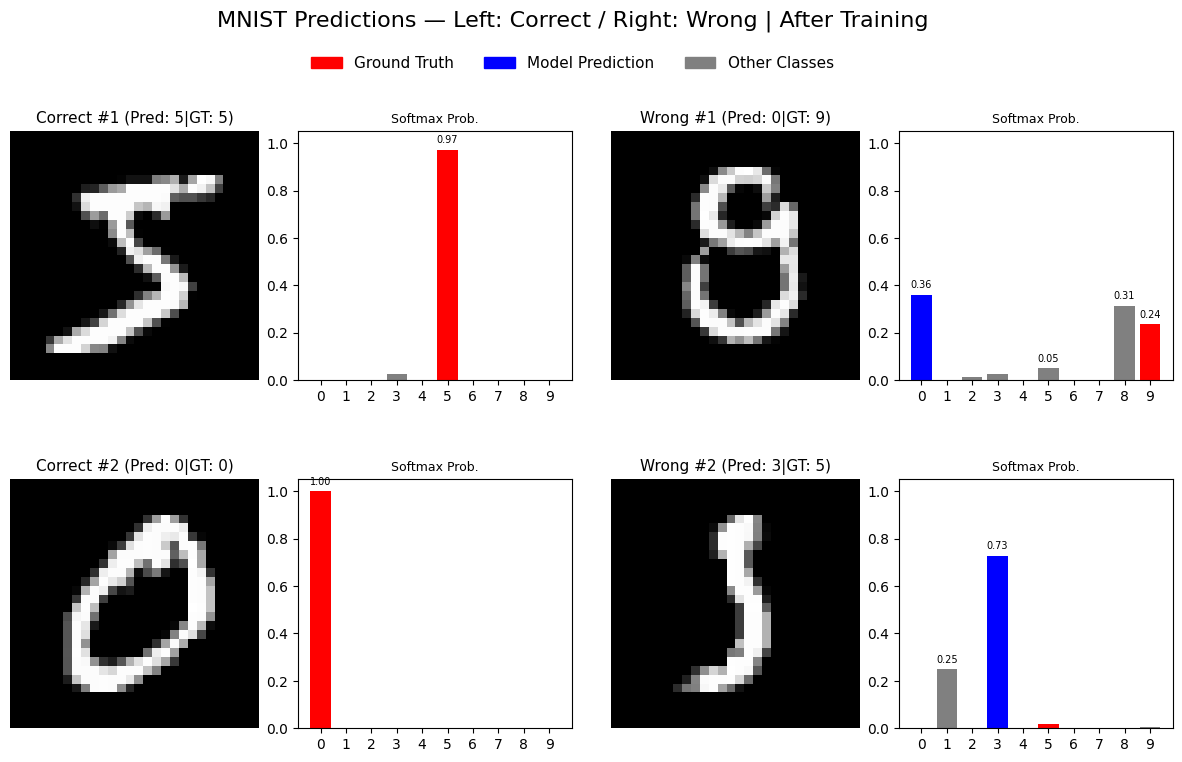

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
import matplotlib.patches as mpatches

model.eval()

correct_samples, wrong_samples = [], []

for idx in range(len(train_dataset)):
    img, label = train_dataset[idx]
    with torch.no_grad():
        x = img.unsqueeze(0).to(device)
        logits = model(x)
        probs = F.softmax(logits, dim=1).cpu().numpy().flatten()
    pred = np.argmax(probs)

    if pred == label and len(correct_samples) < 2:
        correct_samples.append((idx, img, label, pred, probs))
    elif pred != label and len(wrong_samples) < 2:
        wrong_samples.append((idx, img, label, pred, probs))
    if len(correct_samples) == 2 and len(wrong_samples) == 2:
        break

fig = plt.figure(figsize=(15, 8))
gs = GridSpec(2, 4, figure=fig, width_ratios=[1, 1.1, 1, 1.1], wspace=0.15, hspace=0.3)

samples = [
    ("Correct #1", correct_samples[0]),
    ("Wrong #1", wrong_samples[0]),
    ("Correct #2", correct_samples[1]),
    ("Wrong #2", wrong_samples[1]),
]

for i, (title, (idx, img, label, pred, probs)) in enumerate(samples):
    row = i // 2
    col = (i % 2) * 2  # 0, 2
    img_ax = fig.add_subplot(gs[row, col])
    bar_ax = fig.add_subplot(gs[row, col + 1])

    img_ax.imshow(img.squeeze(), cmap='gray')
    img_ax.set_title(f"{title} (Pred: {pred}|GT: {label})", fontsize=11)
    img_ax.axis('off')

    colors = []
    for j in range(10):
        if j == label:
            colors.append("red")       # GT
        elif j == pred:
            colors.append("blue")      # pred
        else:
            colors.append("gray")

    bars = bar_ax.bar(range(10), probs, color=colors)
    bar_ax.set_ylim(0, 1.05)
    bar_ax.set_xticks(range(10))
    bar_ax.set_title("Softmax Prob.", fontsize=9)

    for j, p in enumerate(probs):
        if p > 0.05:
            bar_ax.text(j, p + 0.02, f"{p:.2f}", ha='center', va='bottom', fontsize=7)

    img_pos = img_ax.get_position()
    bar_pos = bar_ax.get_position()
    bar_ax.set_position([bar_pos.x0, img_pos.y0, bar_pos.width, img_pos.height])

red_patch = mpatches.Patch(color='red', label='Ground Truth')
blue_patch = mpatches.Patch(color='blue', label='Model Prediction')
gray_patch = mpatches.Patch(color='gray', label='Other Classes')

fig.legend(
    handles=[red_patch, blue_patch, gray_patch],
    loc='upper center',
    bbox_to_anchor=(0.5, 0.98),
    ncol=3,
    fontsize=11,
    frameon=False
)

plt.suptitle("MNIST Predictions — Left: Correct / Right: Wrong | After Training", fontsize=16, y=1.02)
plt.show()

# Figures

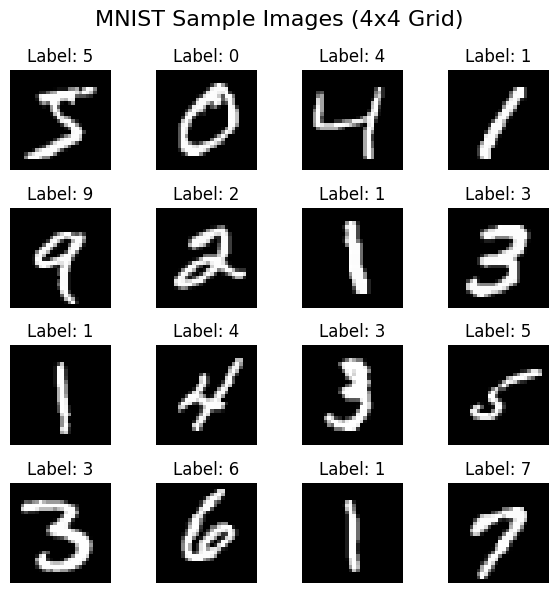

figure_1. MNIST sample images : actual image and labels

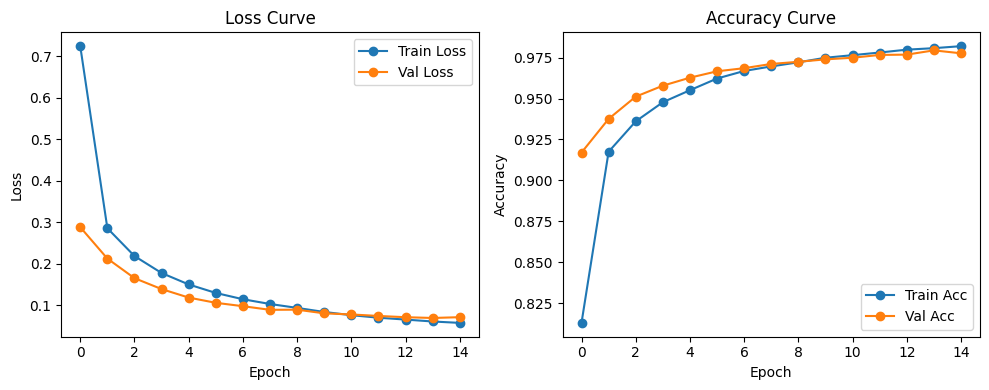

figure_2. Learning curve about train/val acc/loss : both acc & loss converged successfully

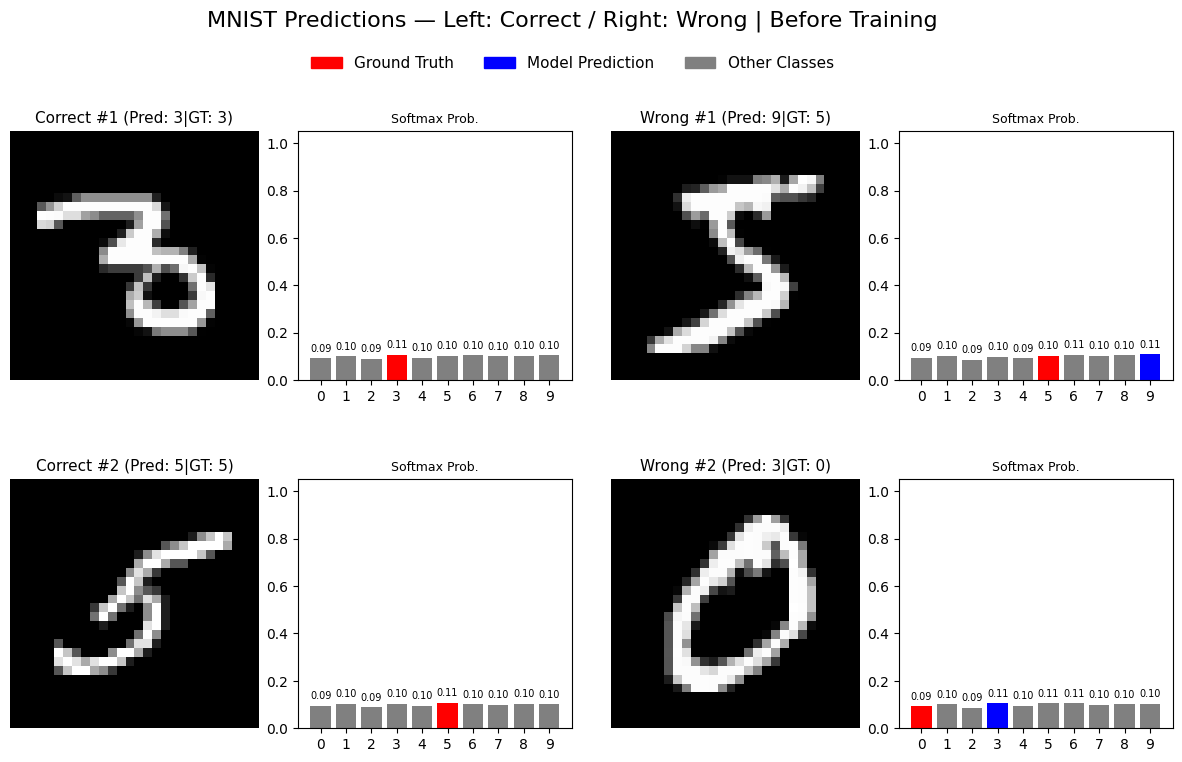

figure_3. Sample result of model prediction before training

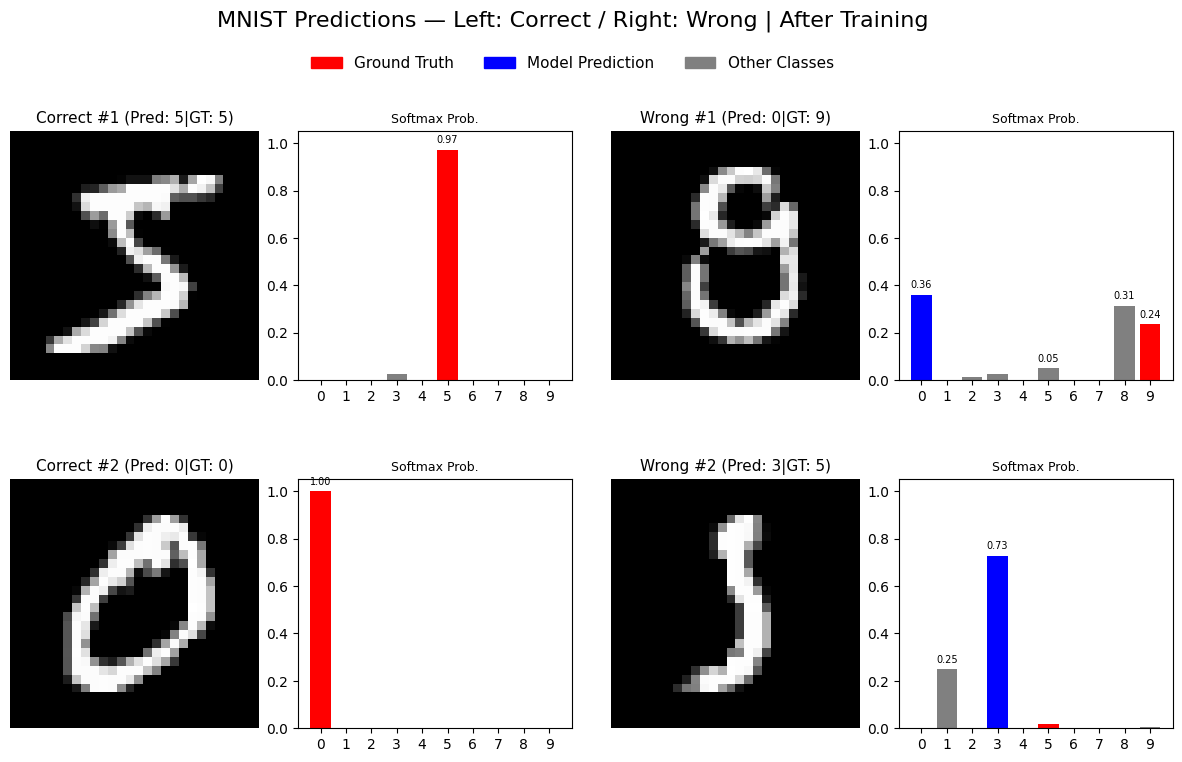

figure_4. Sample result of model prediction after training

In [ ]:
# +a: model summary
from torchsummary import summary

model = MLP().to('cuda')
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]         100,480
              ReLU-2                  [-1, 128]               0
           Dropout-3                  [-1, 128]               0
            Linear-4                  [-1, 128]          16,512
              ReLU-5                  [-1, 128]               0
            Linear-6                   [-1, 10]           1,290
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.45
Estimated Total Size (MB): 0.46
----------------------------------------------------------------
